# Validating a Linear Regression Model

In [3]:
# dependencies
# for data pre-processing and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import locale

# for machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

# set the locale so we can convert decimal and commas to ints
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")

%matplotlib inline

### Data Import

We'll be using the FBI:UCR dataset in NYC to create a model that predicts the ***Property Crime Rate*** given a variety of other features

In [4]:
df = pd.read_csv("data/nyc crime.csv")

In [5]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Adams Village,"1,861",0,0,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0,3,4,16,223,53,165,5,NaN


In [6]:
# rename some columns for ease
df = df.rename(columns={"Murder and nonnegligent manslaughter": "Murder"})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
City                   348 non-null object
Population             348 non-null object
Violent crime          348 non-null object
Murder                 348 non-null int64
Rape                   348 non-null object
Robbery                348 non-null object
Aggravated assault     348 non-null object
Property crime         348 non-null object
Burglary               348 non-null object
Larceny-theft          348 non-null object
Motor vehicle theft    348 non-null object
Arson                  187 non-null float64
dtypes: float64(1), int64(1), object(10)
memory usage: 32.7+ KB


In [12]:
# create a frame we can fully operate on
mutable_df = df.copy()

### Data Preprocessing

In this section we will want to do the following things:

1) Remove NaN values

2) Convert string numbers to integers or floats

3) Split into feature & target set

4) Gain initial insight into the colinearity of the features

In [13]:
# 1) Remove NaN values

print("Old Length:", len(mutable_df))

mutable_df = mutable_df.dropna()

print("New Length:", len(mutable_df))

Old Length: 348
New Length: 187


In [15]:
# 2) Convert String numbers to numeric

convertable_columns = ["Population",
                       "Violent crime",
                       "Rape",
                       "Robbery",
                       "Aggravated assault",
                       "Property crime",
                       "Burglary",
                       "Larceny-theft",
                       "Motor vehicle theft"
                      ]

for column in convertable_columns:
    mutable_df[column] = mutable_df[column].apply(lambda value: locale.atoi(value))

In [16]:
# 3) Split into Feature & Target set

features = mutable_df.drop(columns=["City", "Property crime"])

target = mutable_df["Property crime"]

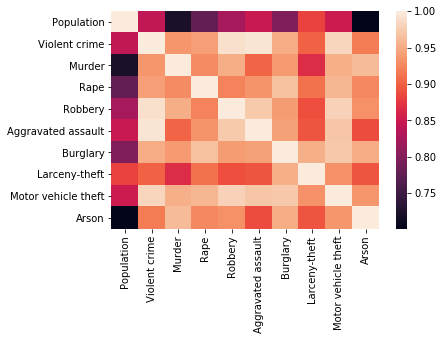

In [17]:
# 4)
# a. Plot correlation heatmap

sns.heatmap(features.corr())

In [18]:
# 4)
# b. Compute and show the VIF scores for each potential feature

In [19]:
vif_df = pd.DataFrame()

vif_df["VIF"] = [VIF(features.values, index) for index in range(features.shape[1])]
vif_df["feature"] = features.columns

vif_df

/Users/ryan/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,feature
0,14.627599,Population
1,inf,Violent crime
2,inf,Murder
3,inf,Rape
4,inf,Robbery
5,inf,Aggravated assault
6,78.221029,Burglary
7,40.133223,Larceny-theft
8,94.302999,Motor vehicle theft
9,29.547922,Arson


### Create the Model

Now comes time to create the model. Here I will create the test train set, train, and test the data. I will plot the residual distribution as well

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=10)

In [21]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
# get the coefficients
model.coef_

array([-1.95797207e-17,  2.62207363e-15, -1.09530761e-14,  1.84702319e-14,
       -7.31740659e-15,  5.92869367e-16,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  3.99508986e-16])

In [23]:
# get the intercept
model.intercept_

1.7053025658242404e-13

In [24]:
predictions = model.predict(X_test)

In [25]:
# compute the r^2 value

rsquared = r2_score(y_test, predictions)

print("R^2: {}".format(rsquared))

R^2: 1.0
